In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3

# Store Analysis

In [3]:
con = sqlite3.connect('IowaLiquor.db')
cur = con.cursor()

In [5]:
query = '''SELECT * FROM Store;'''
cur.execute(query)
result = cur.fetchall()
cur.close()
con.close()

In [8]:
store = pd.DataFrame(result, columns = ['StoreID',
                                            'StoreName',
                                            'City',
                                            'ZipCode',
                                            'CountyNumber',
                                            'County',
                                            'Long',
                                            'Lat'])

In [9]:
store.head()

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat
0,2663,Hy-vee Food Store,Urbandale,50322.0,77.0,Polk,-93.74,41.63
1,2647,Hy-vee 7,Cedar Rapids,52411.0,57.0,Linn,-91.70,42.03
2,5259,Gameday Liquor,Glenwood,51534.0,65.0,Mills,-95.92,41.28
3,5597,Liquor Tobacco & Gas,Dubuque,52001.0,31.0,Dubuque,-90.67,42.51
4,3749,Wal-mart 1526,Storm Lake,50588.0,11.0,Buena Vist,-95.20,42.66


In [67]:
store.groupby(['StoreID', 'StoreName']).agg({'StoreName':'count'})

,,StoreName
StoreID,StoreName,
2106,Hillstreet News & Tobacco,6
2113,Jamboree Foods,6
2130,Sycamore Convenience,6
2132,Spirits & Such,2
2152,Dugans Supermarket,2
...,...,...
9932,3-oaks Distillery Llc,1
9934,Cats Eye Distillery Llc,1
9937,Green Frog Distillery Llc,1


In [68]:
store.loc[store['StoreID'] == 2106]

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat
654,2106,Hillstreet News & Tobacco,Cedar Falls,50613.0,7.0,Black Hawk,-92.46,42.52
2548,2106,Hillstreet News & Tobacco,Cedar Falls,50613,7.0,Black Hawk,-92.46,42.52
2831,2106,Hillstreet News & Tobacco,Cedar Falls,50613,7.0,Black Hawk,-92.46,42.52
4170,2106,Hillstreet News & Tobacco,Cedar Falls,50613,7.0,Black Hawk,-92.46,42.52
4824,2106,Hillstreet News & Tobacco,Cedar Falls,50613,7.0,Black Hawk,-92.46,42.52
8325,2106,Hillstreet News & Tobacco,Cedar Falls,50613.0,7.0,Black Hawk,-92.46,42.52


In [10]:
store.shape

(8627, 8)

In [11]:
store_HyVee = store.copy()

In [12]:
store_HyVee['HyVee_control'] = np.where(store_HyVee['StoreName'].str.contains('Hy-vee'),1,0)
store_HyVee = store_HyVee.loc[store_HyVee['HyVee_control'] == 1]

In [14]:
store_HyVee.head()

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat,HyVee_control
0,2663,Hy-vee Food Store,Urbandale,50322.0,77.0,Polk,-93.74,41.63,1
1,2647,Hy-vee 7,Cedar Rapids,52411.0,57.0,Linn,-91.70,42.03,1
7,2565,Hy-vee Food Store 1636,Spencer,51301.0,21.0,Clay,-95.15,43.15,1
15,2662,Hy-vee Wine & Spirits,Muscatine,52761.0,70.0,Muscatine,-91.04,41.43,1
16,2555,Hy-vee Food Store,Keokuk,52632.0,56.0,Lee,-91.40,40.42,1


<AxesSubplot:xlabel='County'>

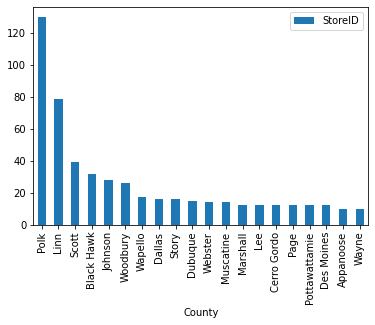

In [15]:
store_HyVee.groupby('County').agg({'StoreID':'count'}).sort_values(by = 'StoreID', ascending = False).head(20).plot.bar()

In [18]:
County_Pop = pd.read_csv('Data/Iowa_County_Population.csv')

In [19]:
County_Pop['Population'] = County_Pop['Population'].str.replace(',','').astype(int)

In [23]:
County_Pop

,Rank,County,Population
0,1,Polk,479612
1,2,Linn,223861
2,3,Scott,172446
3,4,Johnson,148577
4,5,Black Hawk,132393
...,...,...,...
94,95,Taylor,6167
95,96,Osceola,6052
96,97,Audubon,5571
97,98,Ringgold,4964


In [24]:
County_Merge = store_HyVee.merge(County_Pop[['County', 'Population']], on = 'County', how = 'left')

In [26]:
store_HyVee = County_Merge.copy()

In [28]:
store_HyVee.head()

,StoreID,StoreName,City,ZipCode,CountyNumber,County,Long,Lat,HyVee_control,Population
0,2663,Hy-vee Food Store,Urbandale,50322.0,77.0,Polk,-93.74,41.63,1,479612.0
1,2647,Hy-vee 7,Cedar Rapids,52411.0,57.0,Linn,-91.70,42.03,1,223861.0
2,2565,Hy-vee Food Store 1636,Spencer,51301.0,21.0,Clay,-95.15,43.15,1,16211.0
3,2662,Hy-vee Wine & Spirits,Muscatine,52761.0,70.0,Muscatine,-91.04,41.43,1,42889.0
4,2555,Hy-vee Food Store,Keokuk,52632.0,56.0,Lee,-91.40,40.42,1,34227.0


In [30]:
County_Pivot = store_HyVee.groupby(['County']).agg({'Population':'mean', 'StoreName':'count'})

In [31]:
County_Pivot['Store_per_Capital'] = County_Pivot['StoreName'] / County_Pivot['Population']

<AxesSubplot:xlabel='County'>

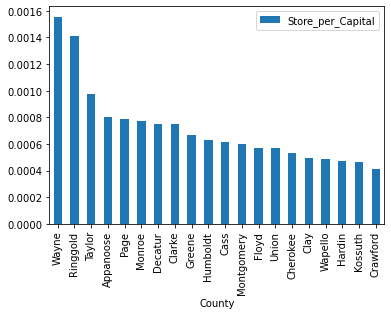

In [33]:
County_Pivot.sort_values(by = 'Store_per_Capital', ascending = False).head(20).plot.bar(y = 'Store_per_Capital')

<AxesSubplot:xlabel='StoreName', ylabel='Population'>

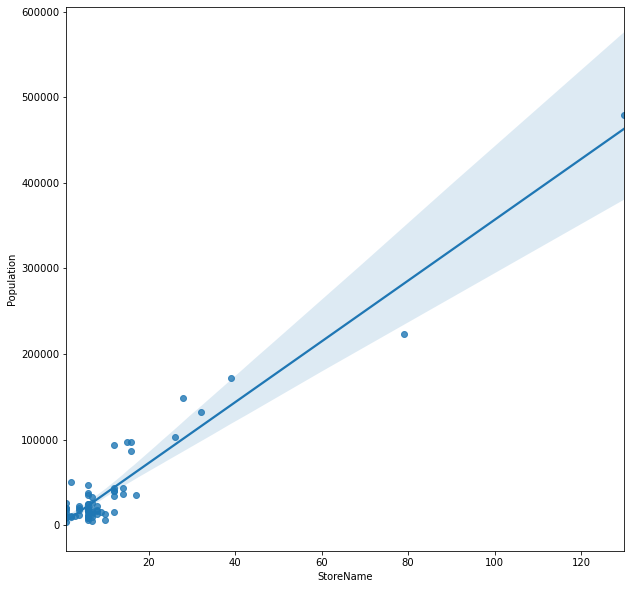

In [38]:
plt.figure(figsize = (10,10))
sns.regplot(data = County_Pivot, x = 'StoreName', y = 'Population')

In [62]:
con = sqlite3.connect('IowaLiquor.db')
cur = con.cursor()

In [59]:
query = '''
SELECT
    Store.StoreName,
    Date,
    Store.County,
    Volume,
    Sale
FROM Transactions
LEFT JOIN Store ON Transactions.StoreID = Store.StoreID
WHERE Store.StoreName LIKE '%Hy-vee%';
'''
transaction_HyVee = pd.read_sql_query(query, con)
cur.close()
con.close()

In [65]:
pd.read_sql_query('''SELECT * FROM Transactions;''',con)

MemoryError: 

In [60]:
transaction_HyVee

,StoreName,Date,County,Volume,Sale
0,Hy-vee,2019-07-09,Polk,2.77,90.0
1,Hy-vee,2019-07-09,Polk,2.77,90.0
2,Hy-vee,2019-07-09,Polk,2.77,90.0
3,Hy-vee,2019-07-09,Polk,2.77,90.0
4,Hy-vee,2019-07-09,Polk,2.77,90.0
...,...,...,...,...,...
38561468,Hy-vee Food & Drug,2021-06-30,Polk,3.17,90.0
38561469,Hy-vee Food & Drug,2021-06-30,Polk,3.17,90.0
38561470,Hy-vee Food & Drug,2021-06-30,Polk,3.17,90.0
38561471,Hy-vee Food & Drug,2021-06-30,Polk,3.17,90.0


In [61]:
transaction_HyVee.groupby(['County']).agg({'Sale':'count'})

,Sale
County,
Adams,17671
Allamakee,757
Appanoose,273614
Benton,1633
Black Hawk,1780348
...,...
Wayne,52508
Webster,497962
Winnebago,14218


In [ ]:
graph1 = transaction_HyVee.groupby([pd.Grouper(key = 'Date',freq = 'M')]).agg({'StoreName':'nunique','Volume':'sum','Sale':'sum'}).reset_index()
sns.lineplot(data = graph1, x='Date', y='StoreName')

In [ ]:
graph2 = transaction_HyVee.groupby(['County',pd.Grouper(key = 'Date',freq = 'M')]).agg({'StoreName':'nunique','Volume':'sum','Sale':'sum'}).reset_index()
sns.lineplot(data = graph2, x = 'Date', y = 'StoreName', hue = 'County')